In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import fitz

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from pprint import pprint

import util
import lines
import classification

In [2]:
test_files_dir = ".././test_files/"
test_files = util.list_files(test_files_dir)
test_files

['.././test_files/LS_index_1937.pdf',
 '.././test_files/LS_index_1986_split.pdf',
 '.././test_files/Argentinia_LS_index_1934_test_I_DE.pdf',
 '.././test_files/LS_index_1976.pdf',
 '.././test_files/LS_index_1944.pdf',
 '.././test_files/LS_index_1986.pdf',
 '.././test_files/LS_Index_1983.pdf',
 '.././test_files/LS_index_1944_split.pdf']

In [51]:
pages, dicts = util.read_pdf(test_files[-1])
lines_df = lines.make_lines_df(dicts)
lines_df = lines.merge_close_lines(lines_df)
lines_df = lines.remove_useless_lines(lines_df)

display(lines_df)

Reading pdf from .././test_files/LS_index_1944_split.pdf
...
Finished reading 6 page(s)


,line_text,spans,x0,y0,x1,y1,page
0,1944—Indexes I — 4 —,"[1944—Indexes I, —, 4, —]",47.0,48.06,221.90,57.31,1
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1
3,"Insurance Acts, 1922 to 19368, and for purpose...","[Insurance Acts, 1922 to 19368, and for purpos...",105.0,90.69,365.77,100.39,1
4,"8 Geo. VI, No. 14. The Unemployed Workers Insu...","[8 Geo. VI, No. 14., The Unemployed Workers In...",105.0,98.59,365.53,109.34,1
...,...,...,...,...,...,...,...
329,"the national territory. (B.O. 18th December, 1...","[the national, territory., (B.O., 18th Decembe...",121.0,524.04,381.10,534.04,6
330,pp. 20-22) Arg. 2 (A),"[pp. 20-22), Arg. 2 (A)]",120.0,532.39,379.77,542.59,6
331,B.O. = Boletin Of icial de Ia Argentina.,"[B.O. =, Boletin, Of icial de Ia, Argentina.]",74.0,549.91,269.09,560.61,6
332,"4L.S. 1929 (Arg. 1, A); 1930 (Arg. 1, A). — 19...","[4L.S. 1929 (Arg. 1, A); 1930 (Arg., 1, A). —,...",73.0,572.39,366.26,583.29,6


In [52]:
lines_df = classification.generate_cluster_labels(lines_df)
lines_df

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label
0,1944—Indexes I — 4 —,"[1944—Indexes I, —, 4, —]",47.0,48.06,221.90,57.31,1,0,0,other
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1,0,2,country
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1,0,1,start
3,"Insurance Acts, 1922 to 19368, and for purpose...","[Insurance Acts, 1922 to 19368, and for purpos...",105.0,90.69,365.77,100.39,1,1,1,middle
4,"8 Geo. VI, No. 14. The Unemployed Workers Insu...","[8 Geo. VI, No. 14., The Unemployed Workers In...",105.0,98.59,365.53,109.34,1,1,1,middle
...,...,...,...,...,...,...,...,...,...,...
329,"the national territory. (B.O. 18th December, 1...","[the national, territory., (B.O., 18th Decembe...",121.0,524.04,381.10,534.04,6,1,1,middle
330,pp. 20-22) Arg. 2 (A),"[pp. 20-22), Arg. 2 (A)]",120.0,532.39,379.77,542.59,6,1,1,middle
331,B.O. = Boletin Of icial de Ia Argentina.,"[B.O. =, Boletin, Of icial de Ia, Argentina.]",74.0,549.91,269.09,560.61,6,0,0,other
332,"4L.S. 1929 (Arg. 1, A); 1930 (Arg. 1, A). — 19...","[4L.S. 1929 (Arg. 1, A); 1930 (Arg., 1, A). —,...",73.0,572.39,366.26,583.29,6,0,1,start


In [63]:
lines_df.loc[lines_df["page"]==4]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label
164,1944—In dexes I —,"[1944—In dexes I, —]",60.0,54.75,212.70,64.65,4,0,0,other
165,SWEDEN (continued),[SWEDEN (continued)],62.0,70.75,171.21,82.85,4,0,2,country
166,A. ',"[A., ']",335.0,75.94,343.49,81.24,4,1,1,middle
167,Mar. .1? to amend section: of,"[Mar., .1?, to amend section:, of]",70.0,89.94,376.66,99.82,4,0,1,start
168,respecting the State control of the public emp...,[respecting the State control of the public em...,177.0,98.44,376.67,107.74,4,1,1,middle
169,exchange (S.F. p. 258) -,"[exchange, (S.F. p. 258), -]",118.0,106.22,286.43,115.92,4,1,0,end
170,Mar 17 Act No 96 to amend Act No 206 of 29th J...,"[Mar, 17, Act No 96, to amend Act No 206 of 29...",70.0,119.35,377.17,129.92,4,0,1,start
171,-. •. workers' p. 259),"[-., •., workers', p. 259)]",66.0,128.50,254.78,139.17,4,0,0,other
172,"Mar. 24 Order No. 231, to amend section 32 of ...","[Mar. 24, Order No. 231, to amend section 32 o...",71.0,141.82,354.92,151.70,4,0,1,start
173,"1931, respecting sick (S.F. pp. 444-445)","[1931, respecting sick, (S.F. pp. 444-445)]",63.0,150.05,258.46,159.54,4,0,0,other


In [148]:
# Improving "country" classification, introducing class "region"

df = lines_df.copy()
df["new_label"] = df["label"]

regex_cont = "(\(cont.\)|\(coni.\)|\(continued\))"

for row in df.loc[lines_df["label"] == "country"].iterrows():
    
    text = row[1]["line_text"]
    
    if re.search("[0-9]{2}", text):
        df.at[row[0], "new_label"] = "other"
        continue
    
    if row[1]["new_label"] == "country":
        text = re.sub(regex_cont, "", text)
        text = re.sub("1and", "land", text)
        text = re.sub("[,.:;]", "", text)
        text = text.strip()
        
        df.at[row[0], "line_text"] = text
    
    if sum(map(str.isupper, text)) < sum(map(str.islower, text)):
        df.at[row[0], "new_label"] = "region"

In [149]:
df.loc[(df["label"] == "country") & (df["new_label"] == "region")]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,new_label
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1,0,2,country,region
16,South Australia,[South Australia],50.0,215.79,125.62,227.89,1,0,2,country,region
20,Tasmania,[Tasmania],50.0,265.94,96.27,277.84,1,0,2,country,region
144,and Northern Ireland,[and Northern Ireland],66.0,426.72,163.28,438.32,3,0,2,country,region
226,Cyprus,[Cyprus],59.0,101.55,92.23,113.05,5,0,2,country,region
232,Gambia,[Gambia..],59.0,158.08,102.99,170.08,5,0,2,country,region
240,Kenya,[Kenya :;],59.0,235.13,102.04,247.73,5,0,2,country,region
245,Leeward Islands,[Leeward Is1ands],59.0,289.05,137.24,300.55,5,0,2,country,region
249,Mauritius,[Mauritius],60.0,329.33,105.89,341.13,5,0,2,country,region


In [150]:
df.loc[df["page"] == 1]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,new_label
0,1944—Indexes I — 4 —,"[1944—Indexes I, —, 4, —]",47.0,48.06,221.90,57.31,1,0,0,other,other
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1,0,2,country,region
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1,0,1,start,start
3,"Insurance Acts, 1922 to 19368, and for purpose...","[Insurance Acts, 1922 to 19368, and for purpos...",105.0,90.69,365.77,100.39,1,1,1,middle,middle
4,"8 Geo. VI, No. 14. The Unemployed Workers Insu...","[8 Geo. VI, No. 14., The Unemployed Workers In...",105.0,98.59,365.53,109.34,1,1,1,middle,middle
5,Amendment Act of 1944.,[Amendment Act of 1944.],105.0,107.51,201.08,116.91,1,1,0,end,end
6,Dec. 14 An Act to amend the Workers' Compensat...,"[Dec. 14, An Act to amend the Workers' Compens...",58.0,121.11,364.94,131.34,1,0,1,start,start
7,in certain particulars [compensation for certa...,[in certain particulars [compensation for cert...,105.0,129.24,364.62,138.74,1,1,1,middle,middle
8,for hospital and medical treatmenti. 9 Geo. VI...,"[for hospital and medical treatmenti., 9 Geo. ...",105.0,135.74,365.15,147.34,1,1,1,middle,middle
9,Workers' Compensation Acts Amendment Act of 194&,[Workers' Compensation Acts Amendment Act of 1...,106.0,145.19,321.66,154.89,1,1,1,middle,middle


In [163]:
# Improving "start" classification

df = lines_df.copy()
df["new_label"] = df["label"]

regex_date = "[A-Z]([a-z]{2}.?|[a-z]{3}.?) [0-9]{1,2}"

df["date"] = ""

for row in df.iterrows():
    text = row[1]["line_text"]
    date_match = re.search(regex_date, text[:12])
    
    if date_match:
        df.at[row[0], "date"] = date_match.group()
    if date_match == None:
        df.at[row[0], "new_label"] = "other"

In [164]:
df.loc[(df["label"] == "start") & (df["new_label"] == "start")]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,new_label,date
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1,0,1,start,start,Dec. 1
6,Dec. 14 An Act to amend the Workers' Compensat...,"[Dec. 14, An Act to amend the Workers' Compens...",58.0,121.11,364.94,131.34,1,0,1,start,start,Dec. 14
10,"Dec. 14 An Act to provide that persons who, du...","[Dec. 14, An Act to provide, that persons who,...",58.0,158.34,364.94,169.74,1,0,1,start,start,Dec. 14
17,Dec. 14 An Act to amend the Workmen's Compensa...,"[Dec. 14, An Act to amend the Workmen's Compen...",58.0,233.56,317.22,243.84,1,0,1,start,start,Dec. 14
27,Mar. 25 Legislative Order to amend sections 26...,"[Mar. 25, Legislative Order to amend sections ...",59.0,335.41,366.06,345.91,1,0,1,start,start,Mar. 25
31,Nov. 23 Act to fix a date for the calculation ...,"[Nov. 23, Act to fix a date for the calculatio...",59.0,383.26,365.06,393.66,1,0,1,start,start,Nov. 23
36,Dec. 29 Act to mike an addition to section 88 ...,"[Dec. 29, Act to mike an addition to section 8...",59.0,429.49,366.65,440.39,1,0,1,start,start,Dec. 29
56,Sept. 1 Act to amend [section 1 of] the Act of...,"[Sept. 1, Act to amend [section 1 of] the Act ...",60.0,88.99,368.16,98.69,2,0,1,start,start,Sept. 1
59,Sept. 29 Order to amend [section 5 of] the Ord...,"[Sept. 29, Order to amend [section 5 of], the ...",62.0,118.31,340.95,129.24,2,0,1,start,start,Sept. 29
62,"Dec. 29 Act to amend the Act of 30th April, 19...","[Dec. 29, Act to amend the Act of 30th, April,...",61.0,148.09,368.92,159.39,2,0,1,start,start,Dec. 29


In [128]:
re.search(regex_date, " .June 44")

<re.Match object; span=(2, 9), match='June 44'>

In [19]:
lines_df.to_csv("first_labeling_1986.csv")

In [20]:
lines_df_2 = lines_df.copy().loc[lines_df["label_kmeans_0"]==cl_x0.iloc[0]["label"]]
X0_2 = lines_df_2["x0"].to_numpy()
X0_2 = [[e] for e in X0_2]

kmeans0_2 = KMeans(n_clusters=2).fit(X0_2)

In [21]:
lines_df_2["label_kmeans_0_2"] = kmeans0_2.labels_
lines_df_2.loc[lines_df_2["label_kmeans_0_2"]==0]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,label_kmeans_0_2
0,1987—List No. 3 2 (108),"[1987—List No. 3 , 2 , (108) ]",75.36,38.50,404.51,52.27,1,1,0,start,0
1,ANGOLA (cont.),"[ANGOLA, (cont.) ]",73.92,63.82,137.18,74.97,1,1,1,country,0
2,"29/III/1986 Act No. 7, to regulate the status...","[29/III/1986 , Act No. 7, to regulate the stat...",73.92,76.30,404.79,86.97,1,1,0,start,0
10,2/VI/1986 Executive Decree No. 22 to approve ...,"[2/VI/1986 , Executive Decree No. 22 to approv...",73.92,160.78,404.86,171.45,1,1,0,start,0
16,9/VI/l 986 Decree No. 11 to approve the regu...,"[9/VI/l, 986, Decree No. 11 to approve the r...",73.44,220.06,404.26,230.73,1,1,0,start,0
18,14/VI/1986 Decree No. 12 to approve the reg...,"[14/VI/1986 , Decree No., 12, to approve the...",74.40,241.18,405.26,251.85,1,1,0,start,0
25,9/VIII/1986 Decree No. 16 to approve the re...,"[9/VIII/1986 , Decree No., 16, to approve th...",73.92,308.86,405.05,319.53,1,1,0,start,0
28,ANGUILLA,[ANGUILLA ],74.16,370.37,120.22,381.45,1,1,1,country,0
29,29/V/1986 The Social Security (Amendment) Ord...,"[29/V/1986 , The Social Security (Amendment) O...",74.16,382.78,405.15,393.45,1,1,0,start,0
33,29/V/1986 The Control of Employment (Amendmen...,"[29/V/1986 , The Control of Employment (Amendm...",74.16,424.78,373.82,435.45,1,1,0,start,0


<AxesSubplot:xlabel='label_kmeans_0', ylabel='x0'>

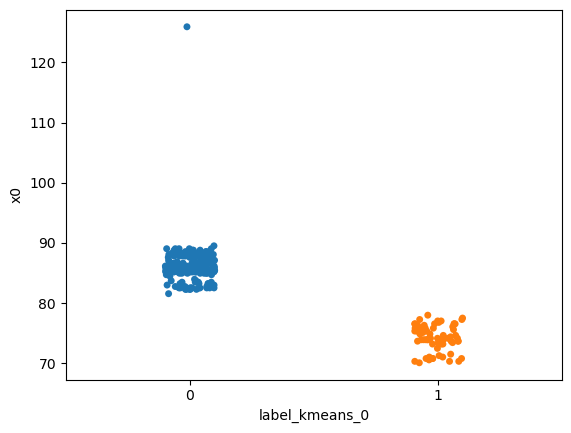

In [22]:
sns.stripplot(data=lines_df, y = "x0", x = "label_kmeans_0")

<AxesSubplot:xlabel='label_kmeans_0_2', ylabel='x0'>

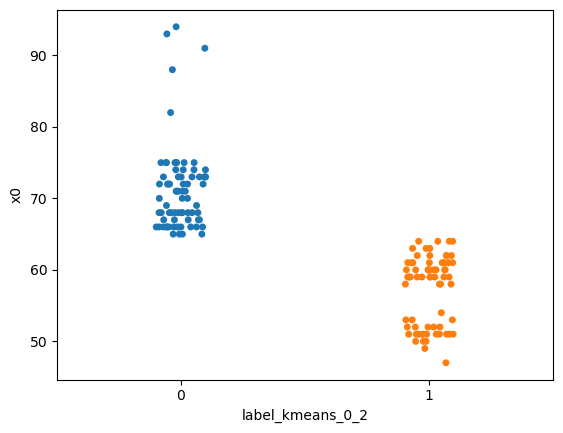

In [12]:
sns.stripplot(data=lines_df_2, y = "x0", x = "label_kmeans_0_2")

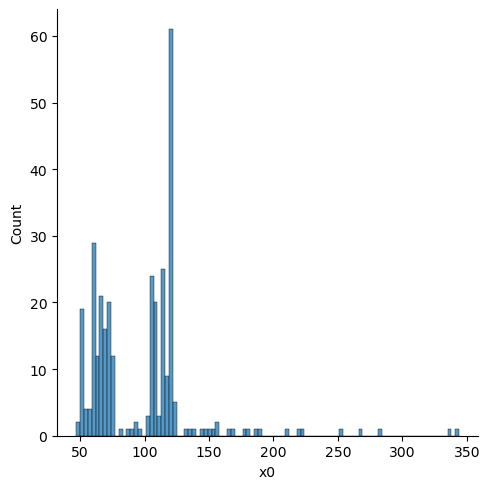

In [13]:
sns.displot(data=lines_df, x = "x0", binwidth=3)

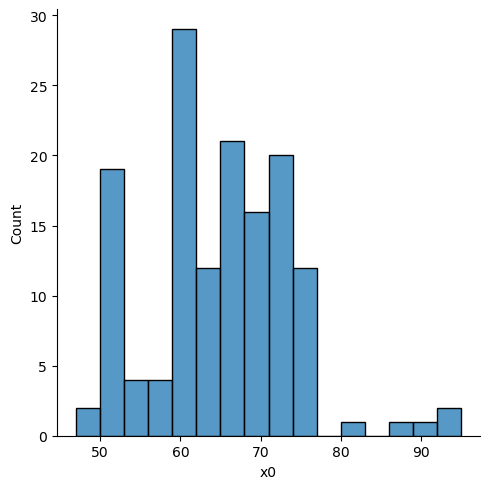

In [14]:
sns.displot(data=lines_df_2, x = "x0", binwidth=3)

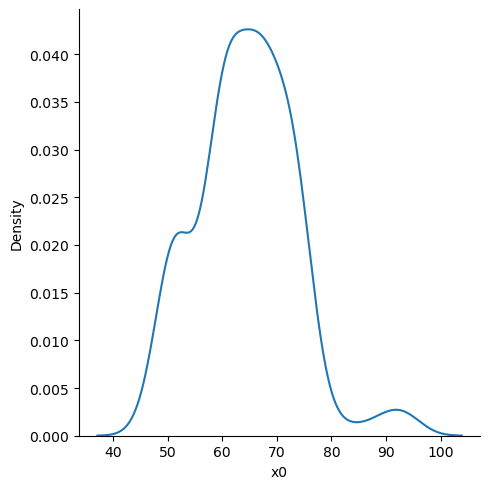

In [15]:
sns.displot(data=lines_df_2, x = "x0", kind="kde")

<AxesSubplot:xlabel='label_kmeans_1', ylabel='x1'>

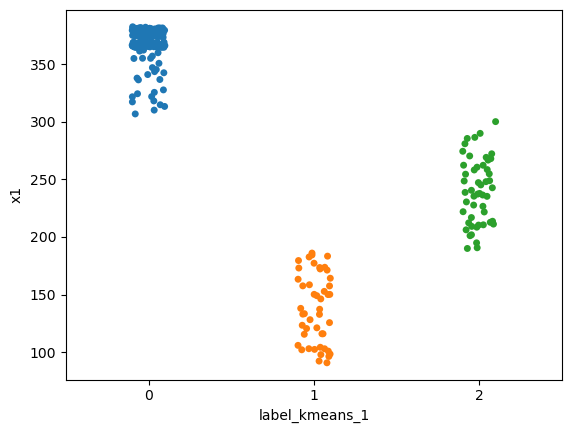

In [16]:
sns.stripplot(data=lines_df, y = "x1", x = "label_kmeans_1")

In [18]:
dicts[3]

{'width': 397.2,
 'height': 646.32,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (60.0, 54.7450065612793, 212.6999969482422, 64.64503479003906),
   'lines': [{'spans': [{'size': 8.100000381469727,
       'flags': 4,
       'font': 'Times-Roman',
       'color': 0,
       'ascender': 0.75,
       'descender': -0.25,
       'text': '1944—In dexes I',
       'origin': (60.0, 60.82000732421875),
       'bbox': (60.0,
        54.7450065612793,
        116.23838806152344,
        62.845008850097656)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (60.0, 54.7450065612793, 116.23838806152344, 62.845008850097656)},
    {'spans': [{'size': 7.699999809265137,
       'flags': 4,
       'font': 'Times-Roman',
       'color': 0,
       'ascender': 0.75,
       'descender': -0.25,
       'text': '—',
       'origin': (205.0, 62.72003173828125),
       'bbox': (205.0,
        56.945030212402344,
        212.6999969482422,
        64.64503479003906)}],
     'wmode': 0,
     'dir': (1.0, 

In [12]:
print(pages[1750])

(1755)
—
5 —
ARGENTINE REPUBLIC (continued)
FEDERAL GOVERNMENT (continued)
Aug. 28
Act no. 11,896, to set up a National Unemployment Board. (B.O. no. 12,073,
p. 417; no. 12,124, p. 419)
Sept. II
Act no. 21,729, to amend sections 154—160 of the Commercial Code [com-
mercial employees]. (B.O. no. 12,086, p.
Text: Arg. 3
Oct. 8
Act no. 22,104, to provide for the taking of a census of industry for the whole
territory of the Republic.
(B.O. no. 12,112, p. 2052)
Oct. 9
Act no. 22,207, to provide for compulsory treatment and prophylactic measures
for ankylostomiasis.
(B.O. no. 12,140, p. 1202)
Oct. 9
Act no. 12,111, to provide for six weeks' leave with pay before and after
childbirth for women wage-earning and salaried employees of the State.
(DO. no. 12,140, p. 1202)
Oct. ix
Act no. 11929,
to ratify the Convention between the Argentine Republic
and the Kingdom of Denmark concerning reciprocity with respect to the
treatment of workers in matters of compensation for industrial accidents,
signe

## Probleme
- Dokumente mit 2 Spalten
- Dokumente mit Länder-Überschrift über ganze Breite der Seite
- Erkennen, ab welcher Seite die eigentlichen Indexes beginnen
- Unnötigen Anfangstext auf der ersten Seite rausfiltern

## Fragen
- Sollen Regionen auch rausgefiltert werden?
- Sollen zusätzliche Infos in Klammern auch rausgefiltert werden?